<a href="https://colab.research.google.com/github/VivekGangurde94/Mlproject/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# importing algorithm & data split feature
from sklearn.model_selection import train_test_split




In [2]:
import os

In [3]:
src_path='drive/MyDrive/flower_photos'

train_path=os.path.join(src_path,'train')
val_path=os.path.join(src_path,'validation')
tulips_tr, tulips_val = os.path.join(train_path,'tulips'),os.path.join(val_path,'tulips')
sunflowers_tr, sunflowers_val = os.path.join(train_path,'sunflowers'),os.path.join(val_path,'sunflowers')
roses_tr, roses_val = os.path.join(train_path,'roses'),os.path.join(val_path,'roses')
dandelion_tr, dandelion_val = os.path.join(train_path,'dandelion'),os.path.join(val_path,'dandelion')
daisy_tr, daisy_val = os.path.join(train_path,'daisy'),os.path.join(val_path,'daisy')

batch_size=32
training_size=len(os.listdir(tulips_tr))+len(os.listdir(sunflowers_tr))+len(os.listdir(roses_tr))+len(os.listdir(dandelion_tr))+len(os.listdir(daisy_tr))
testing_size=len(os.listdir(tulips_val))+len(os.listdir(sunflowers_val))+len(os.listdir(roses_val))+len(os.listdir(dandelion_val))+len(os.listdir(daisy_val))

In [4]:
len(os.listdir(tulips_tr))+len(os.listdir(sunflowers_tr))+len(os.listdir(roses_tr))+len(os.listdir(dandelion_tr))+len(os.listdir(daisy_tr))

2131

In [5]:
path='drive/MyDrive/flower_photos/train'
os.listdir(path)

['roses', 'sunflowers', 'daisy', 'tulips', 'dandelion']

In [ ]:
os.listdir(roses_tr)

In [7]:
# image visulatization
import cv2
image_path=os.path.join(roses_tr,os.listdir(roses_tr)[11])
image_path



'drive/MyDrive/flower_photos/train/roses/24781114_bc83aa811e_n.jpg'

In [8]:
image_path1=os.path.join(roses_val,os.listdir(roses_tr)[1])
image_path1

'drive/MyDrive/flower_photos/validation/roses/123128873_546b8b7355_n.jpg'

In [9]:
image=cv2.imread(image_path)
image.shape

(256, 320, 3)

In [10]:
[i for i in dir(cv2) if i.__contains__('RGB2BGR')]

['COLOR_RGB2BGR', 'COLOR_RGB2BGR555', 'COLOR_RGB2BGR565', 'COLOR_RGB2BGRA']

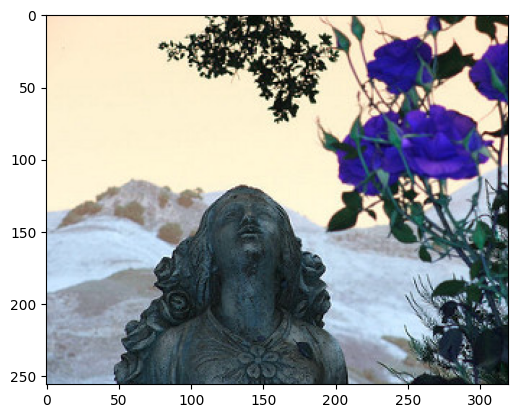

In [11]:

plt.imshow(image)
# this not orginal image matplotlip work on RGB so we dont get ornginal image colour so we have conver into RGB data into BGR

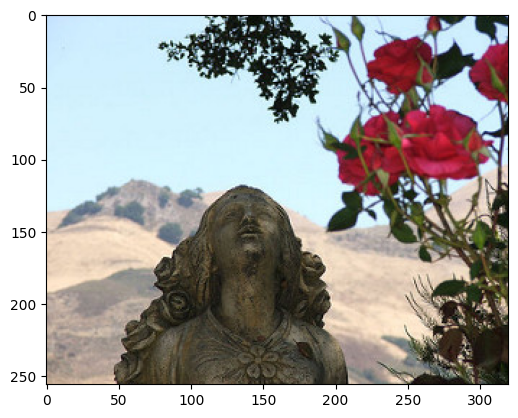

In [12]:
conv=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
plt.imshow(conv)
# her we get orginal image of rose

In [13]:
# Augmenting the data


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# we dont do augmentaion on val data is for only testing
# creating the train data generator
tr_datagen= ImageDataGenerator(rescale=1./255.,
                               rotation_range=40,
                               width_shift_range= 0.2,
                               height_shift_range=0.2,
                               shear_range= 0.2,
                               zoom_range=0.3,
                               horizontal_flip= True,
                               vertical_flip= True,
                               fill_mode='nearest')
# creating the data flow object
train_data= tr_datagen.flow_from_directory(directory=train_path,
                                           batch_size= batch_size,
                                           class_mode='categorical',
                                           target_size=(150,150))



Found 2131 images belonging to 5 classes.


In [16]:
val_datagen = ImageDataGenerator(rescale=1./255.)
# creating the validation dataflow object-4  04
val_data=val_datagen.flow_from_directory(directory=val_path,
                     batch_size= batch_size,
                     class_mode='categorical',
                     target_size=(150,150))

Found 80 images belonging to 5 classes.


In [17]:
labels = {value: key for key, value in train_data.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : daisy
1 : dandelion
2 : roses
3 : sunflowers
4 : tulips


In [18]:
import tensorflow as tf


In [19]:
#@title Building the CNN

In [20]:
# instanting the elu activation function
elu=tf.keras.layers.ReLU()
# instaning the adam aptimizer
adam=tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.95, beta_2=0.99)

In [21]:
# instantianting the model
cnn=tf.keras.Sequential()

# adding the first con-pooling combo
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              padding='same',
                              activation=elu,
                              kernel_initializer='he_uniform',
                              input_shape=(150,150,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

# adding the 2nd  con-pooling combo
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              padding='same',
                              activation=elu,
                              kernel_initializer='he_uniform'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

# adding the 4th con-pooling combo
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              padding='same',
                              activation=elu,
                              kernel_initializer='he_uniform'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))


# adding the 3D con-pooling combo
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              padding='same',
                              activation=elu,
                              kernel_initializer='he_uniform'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

# adding the dropout layer
cnn.add(tf.keras.layers.Dropout(0.3))


#Adding the flatten layer
cnn.add(tf.keras.layers.Flatten())

# addiing the fully connected ANN
# adding the first hidden layer
cnn.add(tf.keras.layers.Dense(units=512,
                             activation='relu',
                             kernel_initializer = 'he_uniform'))

# adding the 2nd hidden layer
cnn.add(tf.keras.layers.Dense(units=512,
                             activation='relu',
                             kernel_initializer = 'he_uniform'))
# adding dropout layer
cnn.add(tf.keras.layers.Dropout(0.3))


# adding the 3rd hidden layer
cnn.add(tf.keras.layers.Dense(units=256,
                             activation='relu',
                             kernel_initializer = 'he_uniform'))
# adding the output layer
cnn.add(tf.keras.layers.Dense(units=5,
                             activation='softmax',
                             kernel_initializer = 'he_uniform'))





In [22]:
# compiling the model
cnn.compile(optimizer= 'RMSprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [23]:
# summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [24]:
history_obj1  = cnn.fit(train_data,
                        epochs=6,
                        batch_size= batch_size,
                        steps_per_epoch=training_size//batch_size,
                        validation_data= val_data,
                        validation_steps= testing_size//batch_size,
                        use_multiprocessing=True,
                        workers=70)

Epoch 1/6
66/66 [==============================] - 285s 4s/step - loss: 1.8559 - accuracy: 0.2754 - val_loss: 1.4377 - val_accuracy: 0.3281
Epoch 2/6
66/66 [==============================] - 254s 4s/step - loss: 1.5462 - accuracy: 0.3421 - val_loss: 1.4151 - val_accuracy: 0.3281
Epoch 3/6
66/66 [==============================] - 255s 4s/step - loss: 1.3015 - accuracy: 0.4359 - val_loss: 1.0886 - val_accuracy: 0.5781
Epoch 4/6
66/66 [==============================] - 278s 4s/step - loss: 1.2089 - accuracy: 0.5026 - val_loss: 1.0949 - val_accuracy: 0.4688
Epoch 5/6
66/66 [==============================] - 276s 4s/step - loss: 1.1381 - accuracy: 0.5384 - val_loss: 0.8471 - val_accuracy: 0.6562
Epoch 6/6
66/66 [==============================] - 258s 4s/step - loss: 1.0827 - accuracy: 0.5707 - val_loss: 0.9105 - val_accuracy: 0.6719


In [25]:
history_obj1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

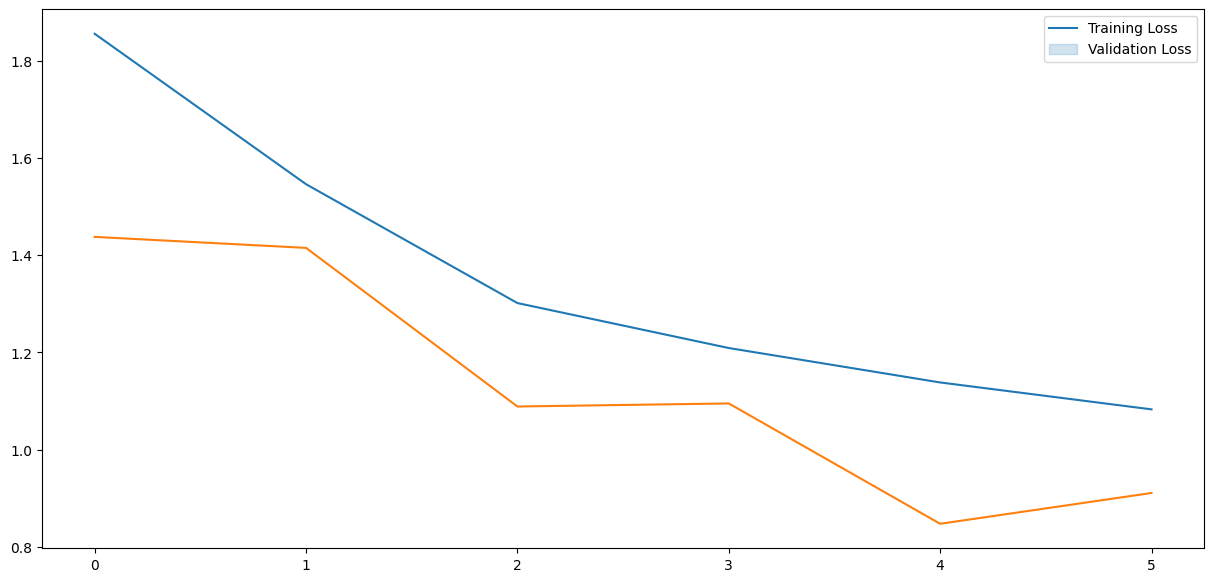

In [26]:
epochs = history_obj1.epoch
tr_loss = history_obj1.history.get('loss')
val_loss = history_obj1.history.get('val_loss')

plt.figure(figsize=(15,7))
sns.lineplot(x = epochs, y = tr_loss)
sns.lineplot(x = epochs, y = val_loss)
plt.legend(['Training Loss','Validation Loss'])
plt.show()

In [27]:
cnn.evaluate(val_data,verbose=1,)

3/3 [==============================] - 2s 515ms/step - loss: 0.9280 - accuracy: 0.6750


[0.9279565811157227, 0.675000011920929]

In [28]:
import numpy as np
predictions = cnn.predict(val_data)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes:', predicted_classes)
print('True labels:', val_data.classes)

3/3 [==============================] - 2s 500ms/step
Predicted classes: [1 1 3 1 3 3 2 0 1 2 1 0 4 0 4 2 1 1 3 3 3 2 1 3 3 3 1 0 1 2 1 3 1 1 1 1 2
 1 3 1 2 1 0 0 4 2 2 1 1 2 2 4 1 2 0 1 0 0 1 0 4 1 2 0 3 0 1 3 4 2 4 1 4 3
 1 1 1 0 4 1]
True labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4]


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy:\n', accuracy_score(val_data.classes, predicted_classes))

Accuracy:
 0.2125


In [30]:
test_path=os.path.join(src_path,'test')

In [31]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                 shuffle=False,
                                                 batch_size=batch_size,
                                                 target_size = (150, 150),
                                                 class_mode='categorical')

Found 50 images belonging to 5 classes.


In [32]:
predictions = cnn.predict(test_generator)

2/2 [==============================] - 5s 4s/step


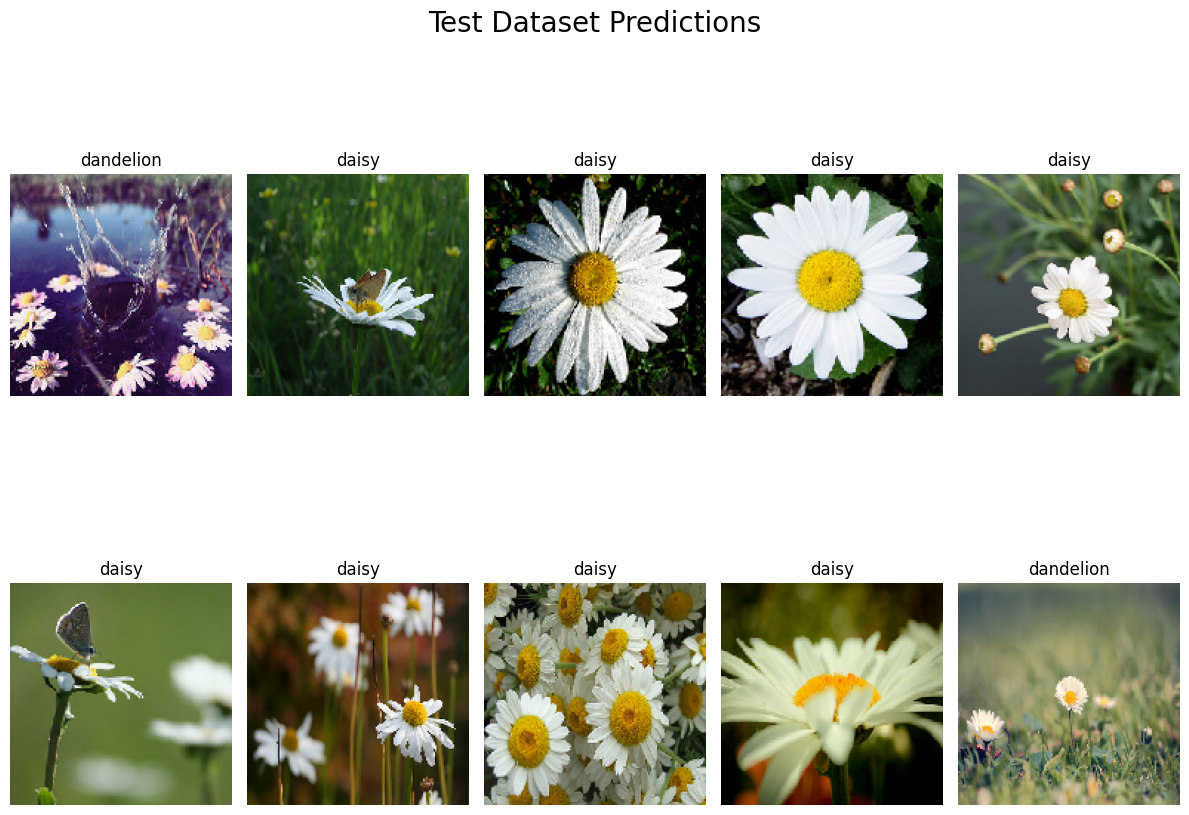

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [34]:
test_loss, test_accuracy = cnn.evaluate(test_generator, batch_size=batch_size)

2/2 [==============================] - 2s 352ms/step - loss: 0.9350 - accuracy: 0.6600


In [35]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.9350072741508484
Test Accuracy: 0.6600000262260437


In [36]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

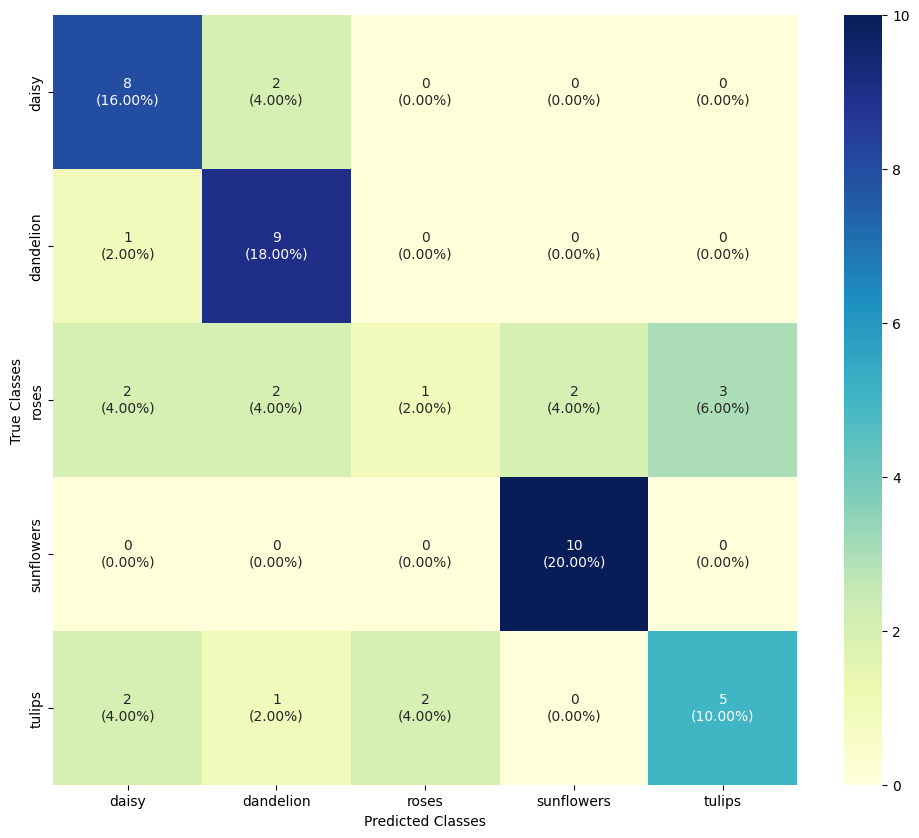

In [45]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(5,5)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [41]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

       daisy       0.62      0.80      0.70        10
   dandelion       0.64      0.90      0.75        10
       roses       0.33      0.10      0.15        10
  sunflowers       0.83      1.00      0.91        10
      tulips       0.62      0.50      0.56        10

    accuracy                           0.66        50
   macro avg       0.61      0.66      0.61        50
weighted avg       0.61      0.66      0.61        50



In [42]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [43]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

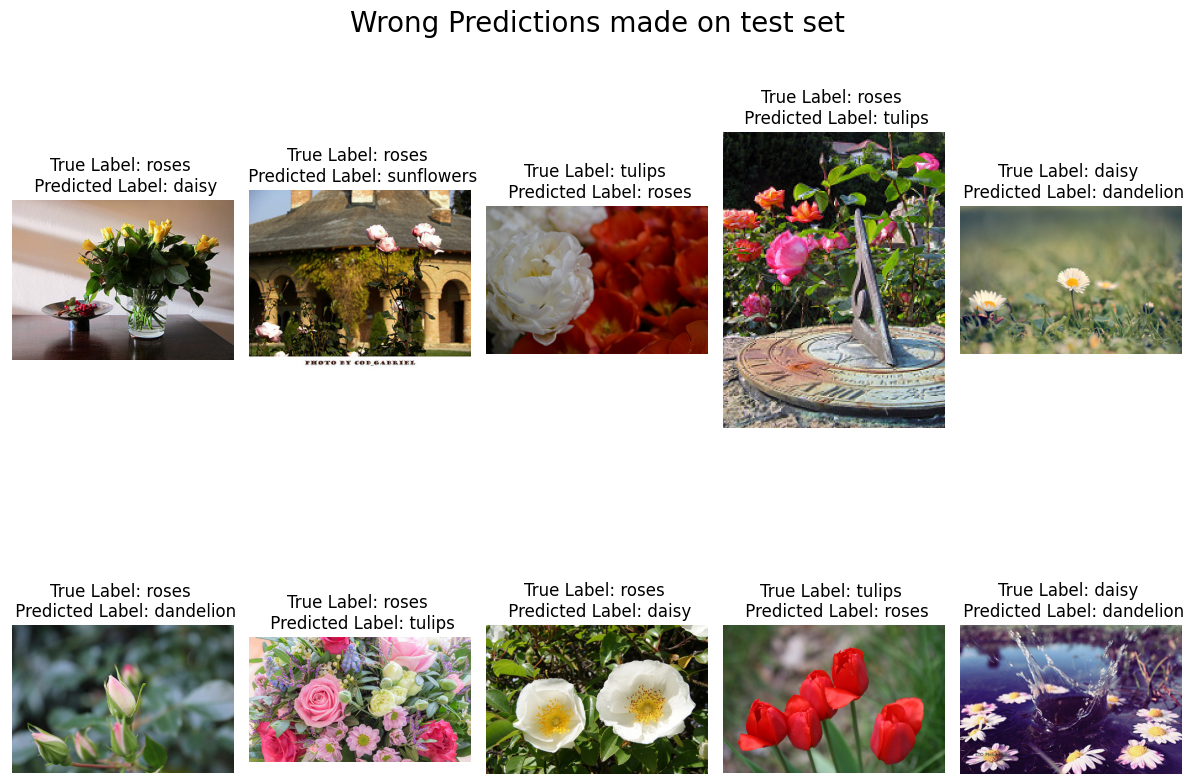

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_path, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()